In [12]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Task 1 Results

In [14]:
df = pd.read_csv("../results/task1/task1_results_summary.csv") \
        .sort_values(by=["map", "dataset"], ascending=[False, True])
from IPython.display import HTML
HTML(df.to_html(index=False))

dataset,prompt,box_threshold,text_threshold,map
C,"The condition is benign if ultrasound confirms a simple cyst, but the condition is suspicious for malignancy if the mass is solid with indistinct margins.",0.3,0.5,0.169622
A,"The observation is considered malignant if it shows a cluster of fine, pleomorphic microcalcifications, but it is benign if the calcifications are coarse, large, and popcorn-like.",0.3,0.5,0.168362
A,"A segmental or linear-branching distribution of calcifications indicates malignancy, whereas diffuse, scattered, bilateral calcifications are a benign finding.",0.3,0.3,0.166108
C,"A radiolucent (dark) mass, such as a lipoma or oil cyst, is a benign condition, while a hyperdense (white) and spiculated mass is a malignant condition.",0.3,0.3,0.163700
C,"The presence of benign vascular calcifications (parallel 'tram-tracks') is not suspicious; the presence of clustered, amorphous calcifications is suspicious for malignancy.",0.3,0.3,0.162244
B,"Architectural distortion or skin retraction is a condition for a malignant tumor, while a mass that is stable and unchanged for several years is a benign condition.",0.3,0.7,0.161460
B,"A well-defined or circumscribed mass is observed in benign cases; an indistinct, microlobulated, or obscured mass is observed in malignant cases.",0.3,0.7,0.157862
B,"A small, oval mass with a lucent center (fatty hilum) is a benign intramammary lymph node; a new, developing focal asymmetry is a malignant sign.",0.3,0.3,0.157386
A,"An observation is benign if it's a round, fat-containing, low-density mass; conversely, it is malignant if it's an irregular, high-density mass.",0.3,0.3,0.155958
A,"A mass with smooth, circumscribed margins is a condition for a benign finding, whereas a mass with spiculated, irregular margins is a condition for malignancy.",0.3,0.3,0.155412


## Task 2 - 1: COOP

### Training

In [8]:
train_dir = Path("../results/task2-1/train")
training_curves = {}

for json_path in sorted(train_dir.glob("dataset_*.json")):
    dataset_id = json_path.stem.split("_")[-1]
    with open(json_path, "r") as f:
        payload = json.load(f)
    curve_df = pd.DataFrame(payload.get("data_points", []))
    training_curves[dataset_id] = {
        "model": payload.get("model", "Unknown"),
        "metric": payload.get("metric", "Loss"),
        "data": curve_df,
    }

# training_curves

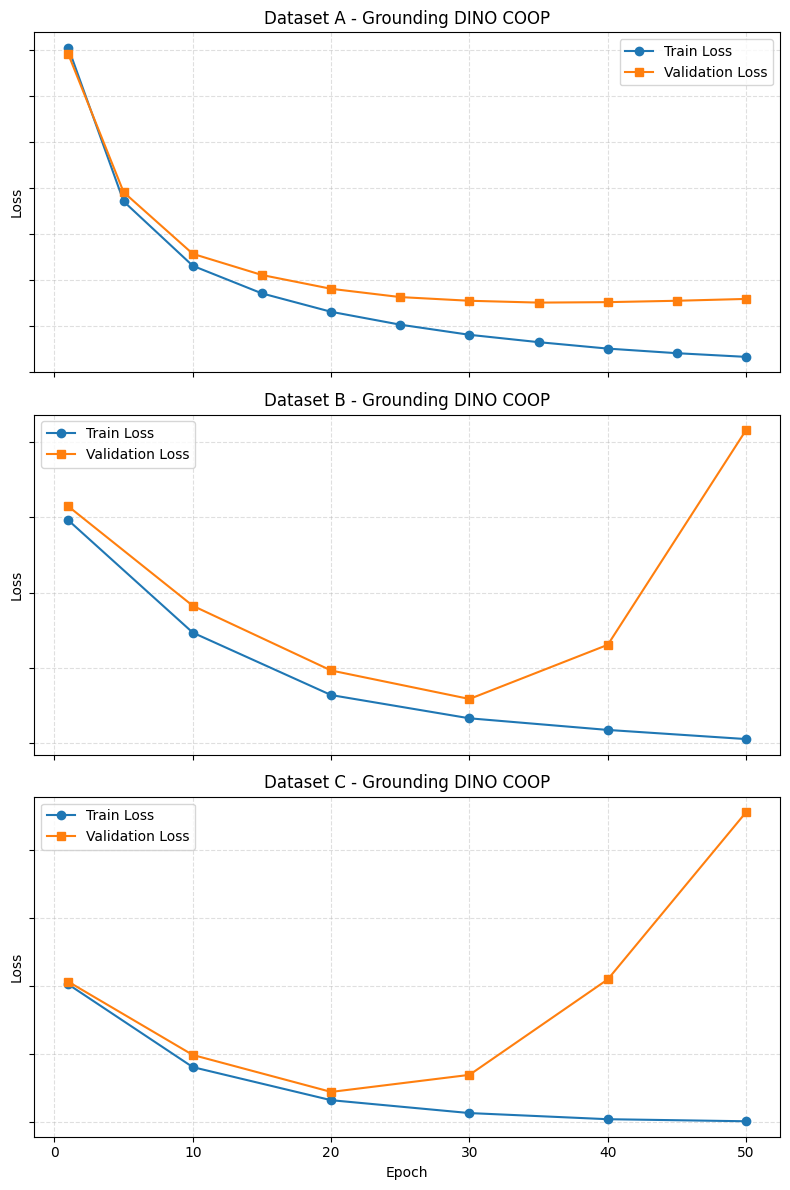

In [10]:
num_plots = len(training_curves)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots), sharex=True)

if num_plots == 1:
    axes = [axes]

for ax, (dataset_id, payload) in zip(axes, sorted(training_curves.items())):
    curve_df = payload["data"]
    ax.plot(curve_df["epoch"], curve_df["train_loss"], label="Train Loss", marker="o")
    ax.plot(curve_df["epoch"], curve_df["validation_loss"], label="Validation Loss", marker="s")
    ax.set_title(f"Dataset {dataset_id} - {payload['model']}")
    ax.set_ylabel(payload["metric"])
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()
    ax.tick_params(axis="y", labelleft=False)

axes[-1].set_xlabel("Epoch")
plt.tight_layout()
plt.show()